In [31]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import linregress
import numpy as np

In [32]:
# reading in the new csv_file 

spotify_df = pd.read_csv(Path("../Resources/spotify-2023_updated.csv"))
spotify_df.head()

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_charts,streams,in_apple_charts,bpm,mode,danceability_pct,valence_pct,energy_pct,acousticness_pct,instrumentalness_pct,liveness_pct,speechiness_pct
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,147,141381703,263,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,48,133716286,126,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,113,140003974,207,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,100,800840817,207,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,50,303236322,133,144,Minor,65,23,80,14,63,11,6


In [33]:
# renaming columns

spotify_df.columns = spotify_df.columns.str.replace("_", " ")
spotify_df.columns = spotify_df.columns.str.title()

spotify_df = spotify_df.rename(columns={"In Spotify Charts": "Spotify Chart Rank",
                                       "In Apple Charts": "Apple Chart Rank",
                                       "Bpm": "BPM"})

spotify_df.head()

,Track Name,Artist Name,Artist Count,Released Year,Released Month,Released Day,Spotify Chart Rank,Streams,Apple Chart Rank,BPM,Mode,Danceability Pct,Valence Pct,Energy Pct,Acousticness Pct,Instrumentalness Pct,Liveness Pct,Speechiness Pct
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,147,141381703,263,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,48,133716286,126,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,113,140003974,207,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,100,800840817,207,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,50,303236322,133,144,Minor,65,23,80,14,63,11,6


In [34]:
def filter_by_artist(artist_name):
    
    sorted_df = spotify_df.sort_values(by="Streams", ascending=False)[["Streams", "Track Name", "Artist Name"]]
    
    filtered_df = sorted_df[sorted_df["Artist Name"].str.contains(artist_name, case=False)]
    
    return filtered_df

def filter_by_track(track_name):
    
    sorted_df = spotify_df.sort_values(by="Streams", ascending=False)[["Streams", "Track Name", "Artist Name"]]
    
    filtered_df = sorted_df[sorted_df["Track Name"].str.contains(track_name, case=False)]
    
    return filtered_df

filter_by_track("barbie")

,Streams,Track Name,Artist Name
29,127408954,Dance The Night (From Barbie The Album),Dua Lipa
44,65156199,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice"
17,30546883,What Was I Made For? [From The Motion Picture ...,Billie Eilish


***BAR: ARTIST COUNT VS STREAMS, KEY VS STREAMS***

***BOXPLOTS: GROUPING STREAMS INTO CATEGORIES OF FOUR THEN PLOT AGAINST FACTORS***

In [35]:
# Defining a function to make scatter plots and calculate linear regressions

def scatter_plot(x, y, x_value, y_value): 
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    
    regress = x * slope + intercept

    plt.scatter(x, y, edgecolors="black")
    plt.plot(x, regress, color='red')
    plt.title(f"{str(x.name)} vs. {str(y.name)}")
    plt.xlabel(str(x.name) + " (per billion)")
    plt.ylabel(str(y.name))
    plt.ylim(0, 100)
    plt.annotate(f"r = {round(rvalue,3)}",(x_value, y_value),fontsize=15,color="red")

    plt.savefig(Path(f"../Images/Scatter Plots/{str(x.name)} vs. {str(y.name)}.png"))
    plt.show()

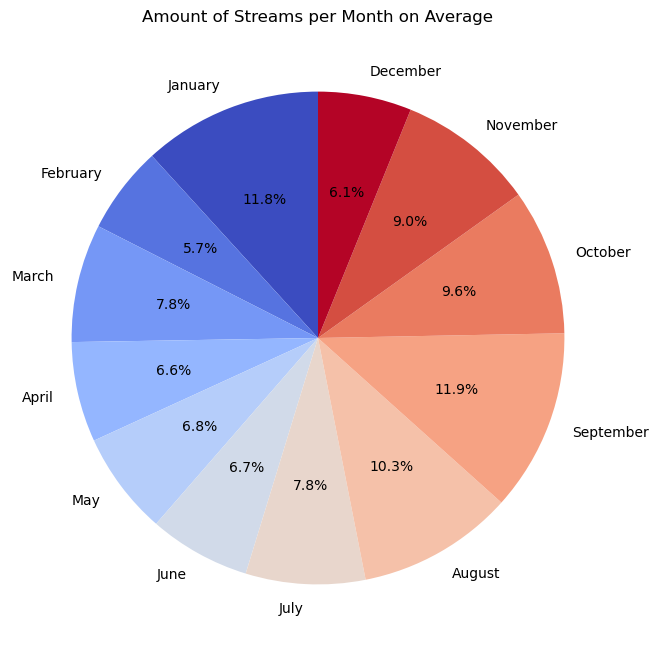

In [63]:
# Creating pie charts on streams released per month

streams_per_month = spotify_df.groupby("Released Month")["Streams"].mean()
streams_per_month

labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
colormap = plt.get_cmap("coolwarm") 
colors = colormap(np.linspace(0, 1, len(streams_per_month)))

plt.figure(figsize=(12,8))
plt.pie(streams_per_month, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title("Amount of Streams per Month on Average")


plt.savefig("../Images/Pie Chart/Amount of Streams per Month on Average")

plt.show()

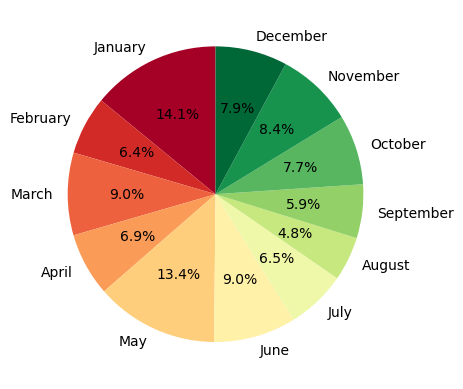

In [37]:
# Creating pie charts on songs released per month

songs_per_month = spotify_df.groupby("Released Month").count()["Released Day"]
songs_per_month

labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
colormap = plt.get_cmap("RdYlGn") 
colors = colormap(np.linspace(0, 1, len(songs_per_month)))

plt.pie(songs_per_month, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)

plt.savefig("../Images/Pie Chart/Amount of Songs Released per Month")

plt.show()

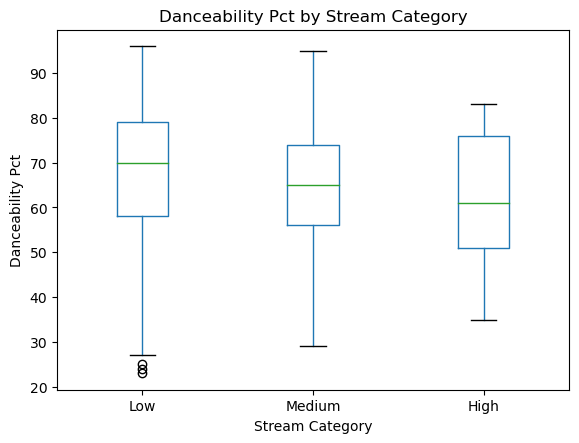

In [38]:
# creating a function for boxplots

bins = [0, 1000000000, 2000000000, float("inf")] 

labels = ["Low", "Medium", "High"]

spotify_df["Stream Category"] = pd.cut(spotify_df["Streams"], bins=bins, labels=labels)

def boxplot(column, by):
    
    spotify_df.boxplot(column=column, by=by, grid=False)

    plt.title(f"{column} by {by}")
    plt.suptitle('')  
    plt.xlabel(by)
    plt.ylabel(column)

    plt.savefig(f"../Images/Boxplots/{column} by {by}")

    plt.show()

boxplot("Danceability Pct", "Stream Category")

In [39]:
spotify_df.columns

Index(['Track Name', 'Artist Name', 'Artist Count', 'Released Year',
       'Released Month', 'Released Day', 'Spotify Chart Rank', 'Streams',
       'Apple Chart Rank', 'BPM', 'Mode', 'Danceability Pct', 'Valence Pct',
       'Energy Pct', 'Acousticness Pct', 'Instrumentalness Pct',
       'Liveness Pct', 'Speechiness Pct', 'Stream Category'],
      dtype='object')

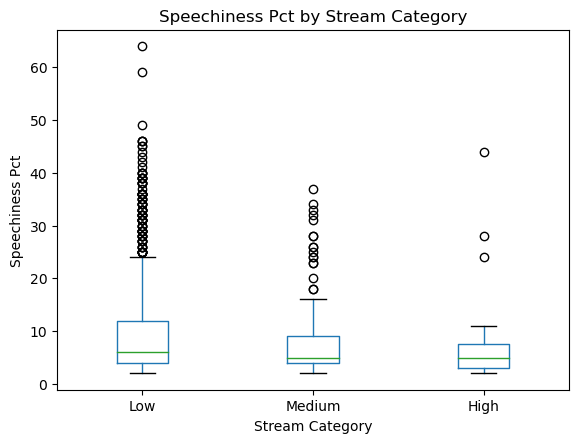

In [40]:
# creating a boxplot on speechiness and stream category
boxplot("Speechiness Pct", "Stream Category")

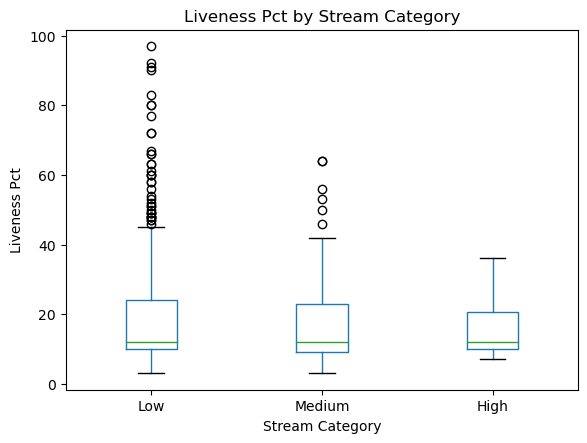

In [41]:
# creating a boxplot on liveness and stream category
boxplot("Liveness Pct", "Stream Category")

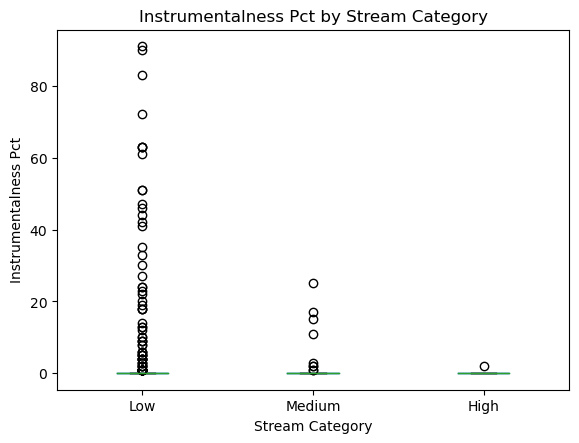

In [42]:
# creating a boxplot on instrumentalness and stream category
boxplot("Instrumentalness Pct", "Stream Category")

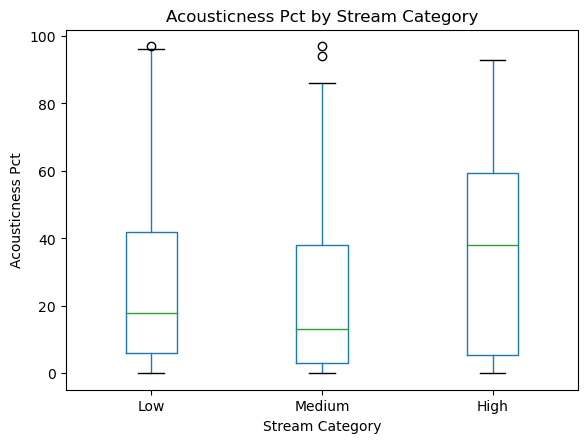

In [43]:
# creating a boxplot on Acousticness and stream category
boxplot("Acousticness Pct", "Stream Category")

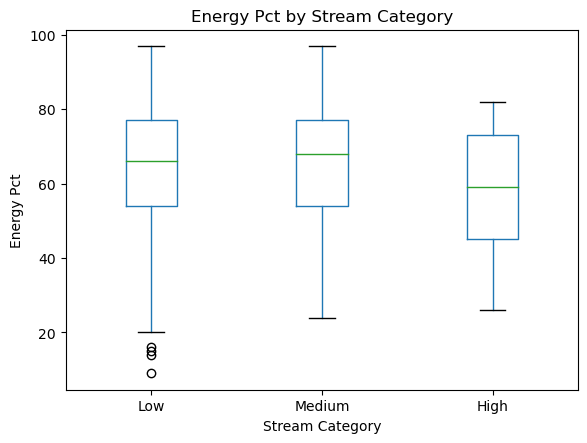

In [44]:
# creating a boxplot on energy and stream category
boxplot("Energy Pct", "Stream Category")

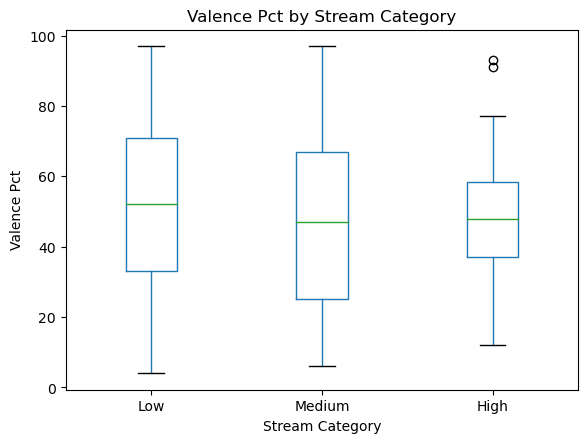

In [45]:
# creating a boxplot on valence and stream category
boxplot("Valence Pct", "Stream Category")

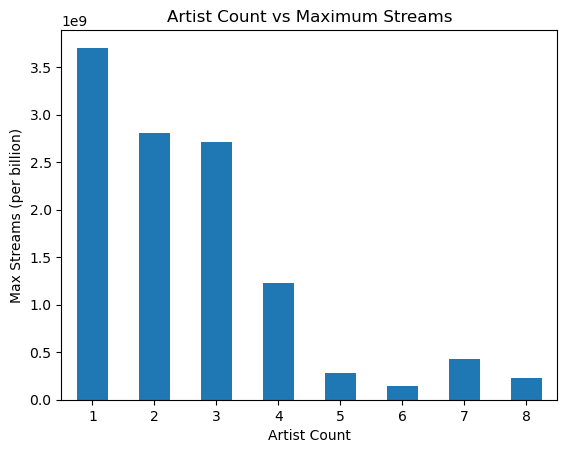

In [46]:
# creating a bar chart on artist count vs streams

artist_count_vs_streams = spotify_df.groupby("Artist Count").max()["Streams"]
artist_count_vs_streams.plot(kind="bar")
plt.title("Artist Count vs Maximum Streams")
plt.xticks(rotation="horizontal")
plt.ylabel("Max Streams (per billion)")
plt.savefig(Path(f"../Images/Bar Plots/Artist Count vs Maximum Streams.png"))

plt.show()


In [49]:
# creating a bar chart on mode vs streams
# spotify_df["Mode"].value_counts()

# mode_vs_streams = spotify_df.groupby("Mode").sum()["Streams"]

# mode_vs_streams.plot(kind="bar")
# plt.title("Mode vs Maximum Streams") 
# plt.xticks(rotation="horizontal")
# plt.ylabel("Max Streams (per billion)")
# plt.savefig(Path(f"../Images/Bar Plots/Mode vs Maximum Streams.png"))

# plt.show()

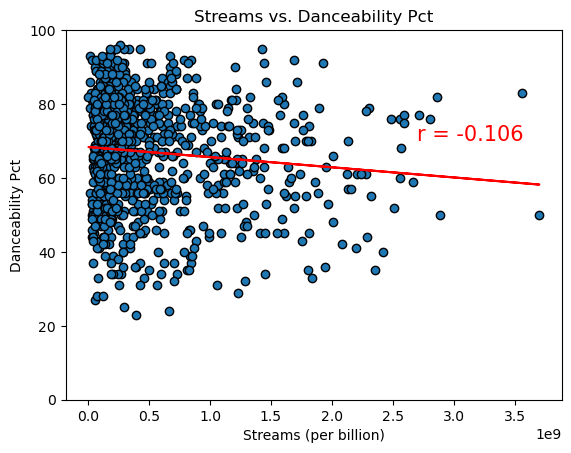

In [50]:
# making a scatter plot comparing danceability and streams 
scatter_plot(spotify_df["Streams"], spotify_df["Danceability Pct"], 2700000000, 70)

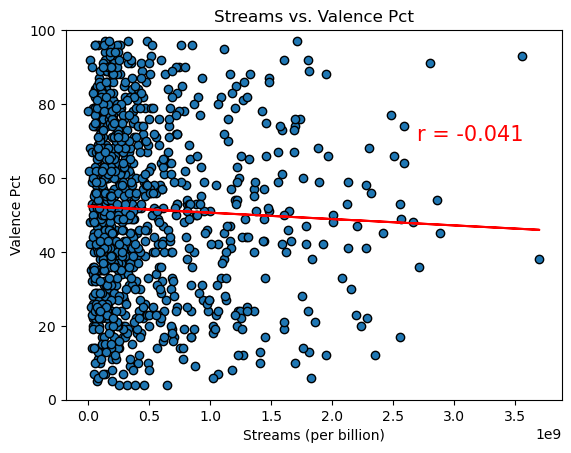

In [ ]:
# making a scatter plot comparing valence and streams 
scatter_plot(spotify_df["Streams"], spotify_df["Valence Pct"], 2700000000, 70)


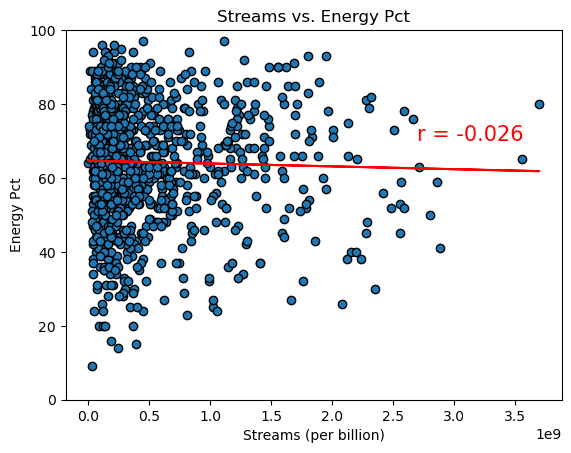

In [ ]:
# making a scatter plot comparing energy and streams 
scatter_plot(spotify_df["Streams"], spotify_df["Energy Pct"], 2700000000, 70)

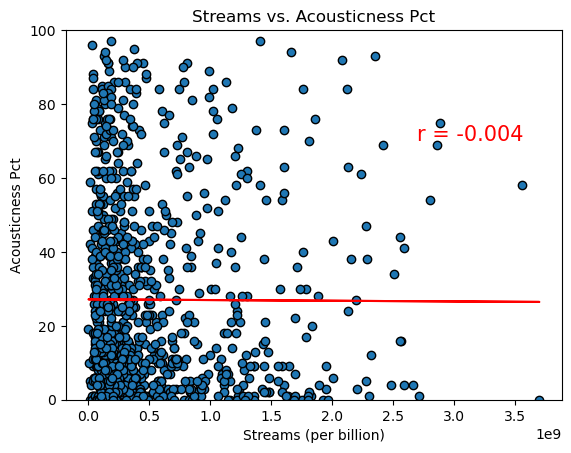

In [ ]:
# making a scatter plot comparing acousticness and streams 
scatter_plot(spotify_df["Streams"], spotify_df["Acousticness Pct"], 2700000000, 70)

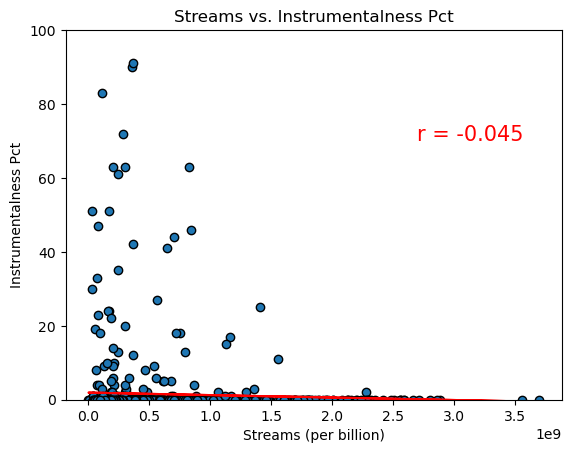

In [ ]:
# making a scatter plot comparing instrumentalness and streams 
scatter_plot(spotify_df["Streams"], spotify_df["Instrumentalness Pct"], 2700000000, 70)

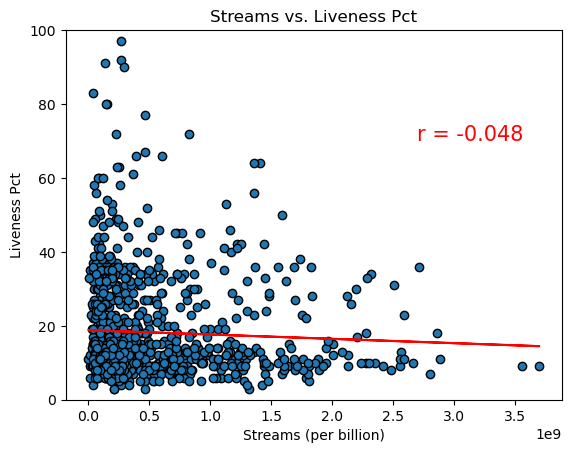

In [ ]:
# making a scatter plot comparing liveness and streams 
scatter_plot(spotify_df["Streams"], spotify_df["Liveness Pct"], 2700000000, 70)

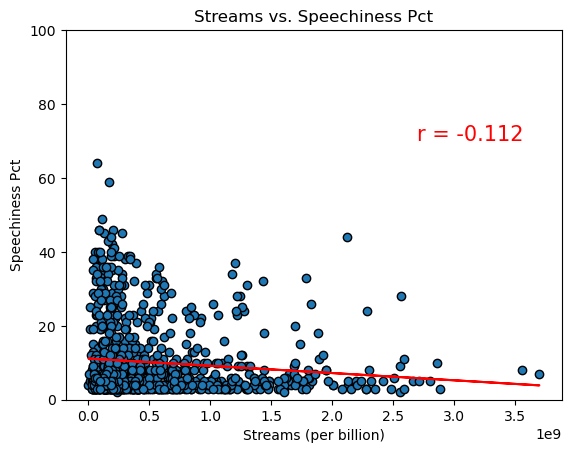

In [ ]:
# making a scatter plot comparing speechiness and streams 
scatter_plot(spotify_df["Streams"], spotify_df["Speechiness Pct"], 2700000000, 70)